In [1]:
# Day 1
# Part one
import numpy as np
data = np.loadtxt('day1.txt', dtype=int)
for j in range(2):
    data[:,j] = sorted(data[:,j])
print(np.sum(np.abs(data[:,1] - data[:,0])))

# Part two
from collections import defaultdict
numbers, counts = np.unique(data[:,1], return_counts=True)
look_up_dict = defaultdict(int)
look_up_dict.update({number:count for number, count in zip(numbers, counts)})
print(sum(d*look_up_dict[d] for d in data[:,0]))

1834060
21607792


In [2]:
# Day 2
# Part one
with open('day2.txt', 'r') as fid:
    data = [[int(d) for d in line.split()] for line in fid.read().strip().split('\n')]

import numpy as np
def is_safe(some_list):
    if len(some_list) < 1:
        return True
    current_sign = np.sign(some_list[1] - some_list[0])
    if current_sign == 0:
        return False
    for j in range(1, len(some_list)):
        diff = some_list[j] - some_list[j - 1]
        if np.sign(diff) != current_sign or abs(diff) > 3:
            return False
    return True

print(sum(is_safe(l) for l in data))

#Part two
def is_safe_when_removing_one(some_list):
    if is_safe(some_list) == True:
        return True
    for j in range(len(some_list)):
        test_list = some_list[:j] + some_list[(j + 1):]
        if is_safe(test_list) == True:
            return True
    return False
print(sum(is_safe_when_removing_one(l) for l in data))

359
418


In [3]:
# Day 3
# Part one
with open('day3.txt') as fid:
    data = fid.read().strip()
import re
pattern = r"\(\d{1,3},\d{1,3}\)"
matches = re.findall(r"mul\(\d{1,3},\d{1,3}\)", data)
s = 0
for m in matches:
    left, rght = m[4:-1].split(',')
    s += int(left)*int(rght)
print(s)

# Part two
s = 0
keywords = [r"don't()", r"do()"]
index_keyword = 0
while data:
    index = data.find(keywords[index_keyword])
    index_keyword = (index_keyword + 1) % 2
    substring, data = data[:index], data[(index + 4):]
    if index_keyword == 1:
        matches = re.findall(r"mul\(\d{1,3},\d{1,3}\)", substring)
        for m in matches:
            left, rght = m[4:-1].split(',')
            s += int(left)*int(rght)
    if index == -1:
        break
print(s)
    
    
    

196826776
106780429


In [4]:
# Day 3
# Part one
with open('day4.txt') as fid:
    lines = fid.read().strip().split('\n')


XMAS = [set(), set(), set(), set()]
for row, line in enumerate(lines):
    for col, c in enumerate(line):
        for index, c_test in enumerate('XMAS'):
            if c == c_test:
                XMAS[index].add((row, col))

def is_XMAS_in_direction_from_pos(pos, dir):
    for j in range(1, 4):
        next_pos = (pos[0] + j*dir[0], pos[1] + j*dir[1])
        if next_pos not in XMAS[j]:
            return False
    return True

all_dir = [(row, col) for row in range(-1, 2) for col in range(-1, 2)]
s = 0
for X_pos in XMAS[0]:
    for dir in all_dir:
        s += is_XMAS_in_direction_from_pos(X_pos, dir)
print(s)

# Part two
def is_MAS(A_pos, dir):
    pos1 = (A_pos[0] + dir[0], A_pos[1] + dir[1])
    pos2 = (A_pos[0] - dir[0], A_pos[1] - dir[1])
    if pos1 in XMAS[1] and pos2 in XMAS[3]:
        return True
    if pos1 in XMAS[3] and pos2 in XMAS[1]:
        return True
    return False

print(sum(is_MAS(A_pos, (1, 1)) and is_MAS(A_pos, (1, -1)) for A_pos in XMAS[2]))


2603
1965


In [5]:
# Day 5
# Part one
from collections import defaultdict
with open('day5.txt') as fid:
    rules, updates = fid.read().strip().split('\n\n')
must_not_include = defaultdict(set)
for rule in rules.split('\n'):
    left, rght = rule.split('|')
    must_not_include[int(left)].add(int(rght))

list_of_updates = [[int(pagenum) for pagenum in upd.split(',')] for upd in updates.split('\n')]

def check_update(update):
    for index, page in enumerate(update):
        for prev_page in update[:index]:
            if prev_page in must_not_include[page]:
                return False
    return True
s = 0
for update in list_of_updates:
    if check_update(update):
        s += update[len(update)//2]
print(s)

# Part two
def page_rank(update):
    ranks = [len(update) - 1]*len(update)
    for index1, page1 in enumerate(update):
        for index2, page2 in enumerate(update):
            if index1 == index2:
                continue
            if page2 in must_not_include[page1]:
                ranks[index1] -= 1
    index_middle_after_sorting = ranks.index(len(update)//2)
    return update[index_middle_after_sorting]

s = 0
for update in list_of_updates:
    if not check_update(update):
        s += page_rank(update)
print(s)

5108
7380


In [6]:
# Day 6
# Part one
obstacles = set()
with open('day6.txt','r') as fid:
    lines = fid.read().strip().split('\n')
    Ncol, Nrow = len(lines[0]), len(lines)
    for row, line in enumerate(lines):
        for col, c in enumerate(line):
            if c == '^':
                guardpos_data = (row, col)
            elif c == '#':
                obstacles.add((row, col))

directions = [(-1, 0), (0, 1), (1, 0), (0, -1)]

dir_index = 0
guardpos = guardpos_data
visited = {guardpos}
while True:
    nextpos = (guardpos[0] + directions[dir_index][0], guardpos[1] + directions[dir_index][1])
    if not (0 <= nextpos[0] < Nrow and 0 <= nextpos[1] < Ncol):
        break
    if nextpos in obstacles:
        dir_index = (dir_index + 1) % 4
        continue
    guardpos = nextpos
    visited.add(guardpos)
print(len(visited))

# Part two
def loop_detect(new_obstacle):
    new_obstacles = {o for o in obstacles}
    new_obstacles.add(new_obstacle)
    dir_index = 0
    guardpos = guardpos_data
    exclude = {(guardpos[0], guardpos[1], dir_index)}
    while True:
        nextpos = (guardpos[0] + directions[dir_index][0], guardpos[1] + directions[dir_index][1])
        if not (0 <= nextpos[0] < Nrow and 0 <= nextpos[1] < Ncol):
            return False
        if nextpos in new_obstacles:
            dir_index = (dir_index + 1) % 4
            continue
        guardpos = nextpos
        elem = (guardpos[0], guardpos[1], dir_index)
        if elem in exclude:
            # Loop detected!
            return True
        else:
            exclude.add(elem)

s = sum(loop_detect(v) for v in visited)
print(s)

5269
1957


In [7]:
# Day 7
# Part one
from collections import deque
with open('day7.txt','r') as fid:
    lines = fid.read().strip().split('\n')
data = []
for line in lines:
    res, q = line.split(':')
    data.append((int(res), deque([int(v) for v in q.strip().split()])))
def evaluate(result, current, remaining):
    if current > result:
        return 0
    if len(remaining) == 0:
        if current == result:
            return 1
        else:
            return 0
    rhs = remaining.popleft()
    plusval = evaluate(result, current + rhs, remaining.copy())
    prodval = evaluate(result, current * rhs, remaining.copy())
    return plusval + prodval

s = 0
for result, ops in data:
    tmp = ops.copy()
    lhs = tmp.popleft()
    n = evaluate(result, lhs, tmp)
    if n > 0:
        s += result
print(s)

# Part two
def evaluate(result, current, remaining):
    if current > result:
        return 0
    if len(remaining) == 0:
        if current == result:
            return 1
        else:
            return 0
    rhs = remaining.popleft()
    plusval = evaluate(result, current + rhs, remaining.copy())
    prodval = evaluate(result, current * rhs, remaining.copy())
    concval = evaluate(result, int(str(current) + str(rhs)), remaining.copy())
    return plusval + prodval + concval

s = 0
for result, ops in data:
    tmp = ops.copy()
    lhs = tmp.popleft()
    n = evaluate(result, lhs, tmp)
    if n > 0:
        s += result
print(s)

4555081946288
227921760109726


In [8]:
# Day 8
# Part one
from collections import defaultdict
antenna_positions = defaultdict(list)
with open('day8.txt', 'r') as fid:
    lines = fid.read().strip().split('\n')
    Ncol, Nrow = len(lines[0]), len(lines)
    for row, line in enumerate(lines):
        for col, c in enumerate(line):
            if c != '.' and c != '#':
                antenna_positions[c].append((row, col))

def get_antinode_positions(ant_list):
    for index, l1 in enumerate(ant_list):
        for index2 in range(index + 1, len(ant_list)):
            l2 = ant_list[index2]
            dif = (l2[0] - l1[0], l2[1] - l1[1])
            pos1 = (l1[0] - dif[0], l1[1] - dif[1])
            pos2 = (l2[0] + dif[0], l2[1] + dif[1])
            for pos in [pos1, pos2]:
                if 0 <= pos[0] < Nrow and 0 <= pos[1] < Ncol:
                    antinode_positions.add(pos)

antinode_positions = set()
for antid, antennas in antenna_positions.items():
    get_antinode_positions(antennas)
print(len(antinode_positions))

def get_antinode_positions(ant_list):
    for index, l1 in enumerate(ant_list):
        for index2 in range(index + 1, len(ant_list)):
            l2 = ant_list[index2]
            dif = (l2[0] - l1[0], l2[1] - l1[1])
            index = 0
            while True:
                pos1 = (l1[0] - index*dif[0], l1[1] - index*dif[1])
                if 0 <= pos1[0] < Nrow and 0 <= pos1[1] < Ncol:
                    antinode_positions.add(pos1)
                else:
                    break
                index += 1
            index = 0
            while True:
                pos2 = (l2[0] + index*dif[0], l2[1] + index*dif[1])
                if 0 <= pos2[0] < Nrow and 0 <= pos2[1] < Ncol:
                    antinode_positions.add(pos2)
                else:
                    break
                index += 1

antinode_positions = set()
for antid, antennas in antenna_positions.items():
    get_antinode_positions(antennas)
print(len(antinode_positions))

400
1280


In [9]:
# Day 9
# Part one

with open('day9.txt', 'r') as fid:
    data = fid.read().strip()

backdatapointer = len(data) - 1
backdatapointer -= (backdatapointer % 2)
datapointer = 0
intdata = list(map(int, data))
N_data_sectors = sum(intdata[0::2])
s = 0
for sector in range(N_data_sectors):
    while intdata[datapointer] == 0:
        datapointer += 1
    if datapointer % 2:
        # Uneven
        j = 0
        while intdata[backdatapointer] == 0:
            backdatapointer -= 2
        fileID = backdatapointer // 2
        intdata[backdatapointer] -= 1
    else:
        # Even:
        fileID = datapointer // 2
    s += sector*fileID
    intdata[datapointer] -= 1
print(s)

# Part two
intdata = list(map(int, data))
sector_pos = 0
freespace = []
dataspace = []
for index, sector_length in enumerate(intdata):
    if index % 2:
        # Uneven, freespace:
        freespace.append((sector_pos, sector_length))
    else:
        # Even, dataspace:
        dataspace.append((sector_pos, sector_length, index // 2))
    sector_pos += sector_length

for j in range(len(dataspace) - 1, -1, -1):
    file_pos, file_length, file_ID = dataspace[j]
    for freespace_ID in range(len(freespace)):
        free_pos, free_length = freespace[freespace_ID]
        if file_pos < free_pos:
            break
        if file_length <= free_length:
            dataspace[j] = (free_pos, file_length, file_ID)
            freespace[freespace_ID] = (free_pos + file_length, free_length - file_length)
            break

s = sum(file_ID*L*(pos + (pos + L - 1))//2 for pos, L, file_ID in dataspace)
print(s)

6366665108136
6398065450842


In [10]:
# Day 10
# Part one

allpos = [set() for j in range(10)]
with open('day10.txt', 'r') as fid:
    lines = fid.read().strip().split('\n')
    Ncol, Nrow = len(lines[0]), len(lines)
    for row, line in enumerate(lines):
        for col, num in enumerate(map(int, line)):
            allpos[num].add((row, col))


def explore(current_pos, last_value):
    if current_pos not in allpos[last_value + 1]:
        return set()
    current_value = last_value + 1
    if current_value == 9:
        # Summit reached!
        return {current_pos}
    summit_pos = set()
    for dir in [(-1, 0), (1, 0), (0, 1), (0, -1)]:
        new_pos = (current_pos[0] + dir[0], current_pos[1] + dir[1])
        summit_pos |= explore(new_pos, current_value)
    return summit_pos

s = 0
for startpos in allpos[0]:
    all_reachable_summits = explore(startpos, -1)
    s += len(all_reachable_summits)
print(s)

# Part two
def explore2(current_pos, last_value):
    if current_pos not in allpos[last_value + 1]:
        return 0
    current_value = last_value + 1
    if current_value == 9:
        # Summit reached!
        return 1
    n_trails = 0
    for dir in [(-1, 0), (1, 0), (0, 1), (0, -1)]:
        new_pos = (current_pos[0] + dir[0], current_pos[1] + dir[1])
        n_trails += explore2(new_pos, current_value)
    return n_trails

s = 0
for startpos in allpos[0]:
    s += explore2(startpos, -1)
print(s)

811
1794


In [11]:
# Day 11
# Part one

with open('day11.txt', 'r') as fid:
    stones = list(map(int, fid.read().strip().split()))

cache_dict = {}

def find_number_of_stones(num, level, maxlevel):
    if level == maxlevel:
        return 1
    key = (num, level, maxlevel)
    if key in cache_dict:
        return cache_dict[key]
    
    level += 1
    if num == 0:
        res = find_number_of_stones(1, level, maxlevel)
        cache_dict[key] = res
        return res
    n = len(str(num))
    if n % 2:
        res = find_number_of_stones(2024 * num, level, maxlevel)
        cache_dict[key] = res
        return res
    else:
        N = 10**(n//2)
        int1 = num//N
        int2 = num % N
        res = (find_number_of_stones(int1, level, maxlevel) + 
               find_number_of_stones(int2, level, maxlevel))
        cache_dict[key] = res
        return res

print(sum(find_number_of_stones(intj, 0, 25) for intj in stones))

# Part two
print(sum(find_number_of_stones(intj, 0, 75) for intj in stones))

199946
237994815702032


In [12]:
# Day 12
# Part one
allcrops = {}
with open('day12.txt', 'r') as fid:
    lines = fid.read().strip().split('\n')
    Ncol, Nrow = len(lines[0]), len(lines)
    for row, line in enumerate(lines):
        for col, crop in enumerate(line):
            allcrops[(row, col)] = crop

def get_field_at_pos(pos):
    crop = allcrops[pos]
    visited = set()
    to_explore = [pos]
    while len(to_explore) > 0:
        pos = to_explore.pop()
        visited.add(pos)
        for dir in [(1, 0), (-1, 0), (0, 1), (0, -1)]:
            newpos = (pos[0] + dir[0], pos[1] + dir[1])
            if newpos in visited or newpos not in allcrops or allcrops[newpos] != crop:
                continue
            to_explore.append(newpos)
    return visited

allkeys = set(allcrops.keys())
fields = []
while len(allkeys):
    pos = allkeys.pop()
    f = get_field_at_pos(pos)
    allkeys -= f
    fields.append(f)

def get_border_count(pos):
    count = 0
    crop = allcrops[pos]
    for dir in [(1, 0), (-1, 0), (0, 1), (0, -1)]:
        newpos = (pos[0] + dir[0], pos[1] + dir[1])
        if newpos not in allcrops or allcrops[newpos] != crop:
            count += 1
    return count

s = 0
for field in fields:
    s += len(field)*sum(get_border_count(pos) for pos in field)
print(s)

# Part two
def get_corner_count(pos):
    count = 0
    crop = allcrops[pos]
    dirs = [(1, 0), (0, -1), (-1, 0), (0, 1)]
    for index, dir1 in enumerate(dirs):
        dir2 = dirs[index - 1]
        p1 = (pos[0] + dir1[0], pos[1] + dir1[1])
        p2 = (pos[0] + dir2[0], pos[1] + dir2[1])
        if ((p1 not in allcrops or allcrops[p1] != crop) and
            (p2 not in allcrops or allcrops[p2] != crop)):
            count += 1
            #print(f'Corner at {pos}')
        px = (pos[0] + dir1[0] + dir2[0], pos[1] + dir1[1] + dir2[1])
        if ((p1 not in allcrops or allcrops[p1] == crop) and
            (p2 not in allcrops or allcrops[p2] == crop) and
            (px in allcrops and allcrops[px] != crop)):
            count += 1
            #print(f'Inner corner at {pos}')
    return count

s = 0
for field in fields:
    s += len(field)*sum(get_corner_count(pos) for pos in field)
print(s)

1488414
911750


In [13]:
# Day 13
# Part one
with open('day13.txt', 'r') as fid:
    configs = fid.read().strip().split('\n\n')

def get_XY_from_button(button):
    tmp = button.strip().split()
    return int(tmp[2][1:-1]), int(tmp[3][1:])

def get_XY_from_prize(button):
    tmp = button.strip().split()
    return int(tmp[1][2:-1]), int(tmp[2][2:])

all_games = []
for config in configs:
    A, B, P = config.split('\n')
    all_games.append([get_XY_from_button(A), get_XY_from_button(B), get_XY_from_prize(P)])

def get_cost_from_game(game, maxpress=100):
    (x1, y1), (x2, y2), (xg, yg) = game
    m, rem1 = divmod(x1*yg - xg*y1, x1*y2 - x2*y1)
    n, rem2 = divmod(xg - m*x2, x1)
    if rem1 == 0 and rem2 == 0 and 0 <= m <= maxpress and 0 <= n <= maxpress:
        return 3*n + m
    else:
        return 0

print(sum(get_cost_from_game(game) for game in all_games))

# Part two
def get_cost_from_game2(game):
    (x1, y1), (x2, y2), (xg, yg) = game
    mult = 10_000_000_000_000
    xg += mult
    yg += mult
    m, rem1 = divmod(x1*yg - xg*y1, x1*y2 - x2*y1)
    n, rem2 = divmod(xg - m*x2, x1)
    if rem1 == 0 and rem2 == 0 and 0 <= m and 0 <= n:
        return 3*n + m
    else:
        return 0

print(sum(get_cost_from_game2(game) for game in all_games))

28262
101406661266314


211773366
7344


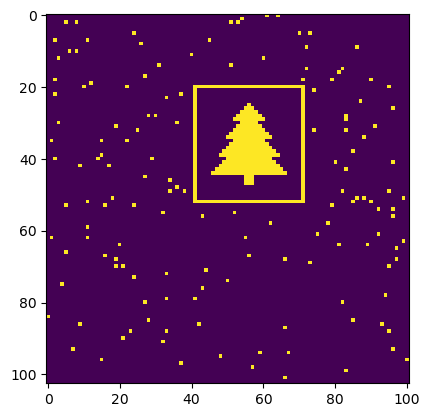

In [14]:
# Day 14
# Part one
data = []
with open('day14.txt') as fid:
    for line in fid.read().strip().split('\n'):
        tmp1, tmp2 = line.split()
        data.append(tuple(map(int, tmp1[2:].split(',') + tmp2[2:].split(','))))

def pos_after_time(posvel, time, Lx=101, Ly=103):
    x, y, vx, vy = posvel
    x += vx*time
    y += vy*time
    return x % Lx, y % Ly

quadrants = [[0, 0], [0,0]]
Lx, Ly = 101, 103
cx, cy = Lx//2, Ly//2
for d in data:
    pos = pos_after_time(d, 100, Lx, Ly)
    if pos[0] == cx or pos[1] == cy:
        continue
    quadrants[pos[1] > cy][pos[0] > cx] += 1
print(quadrants[0][0]*quadrants[0][1]*quadrants[1][0]*quadrants[1][1])

# Part two
import matplotlib.pyplot as plt
def print_picture(allpos, Lx, Ly):
    Z = np.zeros((Ly, Lx))
    for pos in allpos:
        Z[pos[1], pos[0]] += 1
    plt.figure()
    return plt.imshow(Z)

def compute_connected(pos, visited, allpos):
    visited.add(pos)
    for dx in range(-1, 2):
        for dy in range(-1, 2):
            adj_pos = (pos[0] + dx, pos[1] + dy)
            #print(f'{adj_pos=}, {pos=}, {adj_pos in allpos}, {adj_pos not in visited}')
            if adj_pos in allpos and adj_pos not in visited:
                #print('???')
                compute_connected(adj_pos, visited, allpos)
    return visited        
                
def compute_correlation(pos_set_input):
    pos_set = pos_set_input.copy()
    output = []
    #print(pos_set)
    while pos_set:
        pos = pos_set.pop()
        con = compute_connected(pos, set(), pos_set)
        #print(f'{pos=}, {con=}')
        pos_set -= con
        output.append(len(con))
    return output

E = []
for t in range(10403):
    allpos = {pos_after_time(d, t, Lx, Ly) for d in data}
    E.append((len(compute_correlation(allpos)), t))

t_tree = min(E)[1]
print(t_tree)
all_pos = {pos_after_time(d, t_tree, Lx, Ly) for d in data}
print_picture(all_pos, Lx, Ly)
plt.savefig('Xmastree.png')

In [15]:
# Day 15
# Part one
boundaries = set()
boxes = set()
with open('day15.txt') as fid:
    chart, movements = fid.read().strip().split('\n\n')
    lines = chart.split('\n')
    Ncol, Nrow = len(lines[0]), len(lines)
    for row, line in enumerate(lines):
        for col, type in enumerate(line):
            if type == '#':
                boundaries.add((row, col))
            elif type == 'O':
                boxes.add((row, col))
            elif type == '@':
                robot_pos = (row, col)
movements = movements.replace('\n','')
dirmap = {'<':(0, -1), '>':(0, 1), 'v':(1, 0), '^':(-1, 0)}
def try_move(pos, dir):
    next_pos = (pos[0] + dir[0], pos[1] + dir[1])
    if next_pos in boundaries:
        return False
    if next_pos in boxes:
        might_move = try_move(next_pos, dir)
        if not might_move:
            return False
    if pos in boxes:
        boxes.remove(pos)
        boxes.add((next_pos))
    return True

for move in movements:
    dir = dirmap[move]
    if try_move(robot_pos, dir):
        robot_pos = (robot_pos[0] + dir[0], robot_pos[1] + dir[1])

s = 0
for b in boxes:
    s += b[0]*100 + b[1]
print(s)

# Part two
boundaries = set()
boxes = set()
with open('day15.txt') as fid:
    chart, movements = fid.read().strip().split('\n\n')
    lines = chart.split('\n')
    Ncol, Nrow = len(lines[0]), len(lines)
    for row, line in enumerate(lines):
        for col, type in enumerate(line):
            if type == '#':
                boundaries.add((row, 2*col + 0))
                boundaries.add((row, 2*col + 1))
            elif type == 'O':
                boxes.add((row, 2*col))
            elif type == '@':
                robot_pos = (row, 2*col)

def print_warehouse(robot_pos):
    for row in range(Nrow):
        s = ''
        col = 0
        while col < 2*Ncol:
            pos = (row, col)
            if pos in boundaries:
                s += '#'
            elif pos in boxes:
                s += '[]'
                col += 1
            elif pos == robot_pos:
                s += '@'
            else:
                s += '.'
            col += 1
        #print(s)
#print_warehouse(robot_pos)

movements = movements.replace('\n','')
dirmap = {'<':(0, -1), '>':(0, 1), 'v':(1, 0), '^':(-1, 0)}

def _try_move_box_updown(pos, move, dryrun=False):
    dir = dirmap[move]
    next_pos = (pos[0] + dir[0], pos[1] + dir[1])
    left_pos = (next_pos[0], next_pos[1] - 1)
    rght_pos = (next_pos[0], next_pos[1] + 1)
    if next_pos in boundaries or rght_pos in boundaries:
        return False
    if left_pos not in boxes and next_pos not in boxes and rght_pos not in boxes:
        if not dryrun:
            boxes.remove(pos)
            boxes.add(next_pos)
        return True
    may_move = True
    for pos2 in [left_pos, next_pos, rght_pos]:
        if pos2 in boxes:
            may_move *= _try_move_box_updown(pos2, move, dryrun)
    if may_move:
        if not dryrun:
            boxes.remove(pos)
            boxes.add(next_pos)
        return True
    return False

def try_move_box_updown(pos, move):
    if _try_move_box_updown(pos, move, True):
        return _try_move_box_updown(pos, move, False)

def try_move_box_leftright(pos, move):
    dir = dirmap[move]
    next_pos = (pos[0] + dir[0], pos[1] + dir[1])
    nextnext_pos = (pos[0] + 2*dir[0], pos[1] + 2*dir[1])
    
    if move == '<' and next_pos in boundaries:
        return False
    if move == '>' and nextnext_pos in boundaries:
        return False
    if nextnext_pos not in boxes:
        boxes.remove(pos)
        boxes.add(next_pos)
        return True
    if try_move_box_leftright(nextnext_pos, move):
        boxes.remove(pos)
        boxes.add(next_pos)
        return True
    return False

def try_move_robot(pos, move):
    dir = dirmap[move]
    next_pos = (pos[0] + dir[0], pos[1] + dir[1])
    left_pos = (next_pos[0], next_pos[1] - 1)
    if next_pos in boundaries:
        return False
    if next_pos not in boxes and left_pos not in boxes:
        return True
    box_pos = next_pos if next_pos in boxes else left_pos
    assert(box_pos in boxes)
    if move == '<' or move == '>':
        return try_move_box_leftright(box_pos, move)
    else:
        return try_move_box_updown(box_pos, move)
    
for index, move in enumerate(movements):
    if try_move_robot(robot_pos, move):
        dir = dirmap[move]
        robot_pos = (robot_pos[0] + dir[0], robot_pos[1] + dir[1])

s = 0
for b in boxes:
    s += b[0]*100 + b[1]
print(s)

#print_warehouse(robot_pos)

1568399
1575877


In [16]:
# Day 15
# Part one
boundaries = set()

with open('day16.txt') as fid:
    lines = fid.read().strip().split('\n')
    Ncol, Nrow = len(lines[0]), len(lines)
    for row, line in enumerate(lines):
        for col, type in enumerate(line):
            if type == '#':
                boundaries.add((row, col))
            elif type == 'S':
                start_pos = (row, col)
            elif type == 'E':
                end_pos = (row, col)

import heapq
from collections import namedtuple
# Part one and two
Reindeer2 = namedtuple('Reindeer2', ['points', 'j', 'i', 'dir', 'path'])

the_queue = [Reindeer2(0, start_pos[0], start_pos[1], 'E', (start_pos,))]
dir_from_char = {'E':(0, 1), 'W':(0, -1), 'N':(-1, 0), 'S':(1, 0)}
possible_turns = {'N':'EW', 'S':'EW', 'E':'NS', 'W':'NS'}
visits = set()

fewest_points = 1e100
counter = 0
counter_started = False
best_seats = set()
while True:
    r = heapq.heappop(the_queue)
    visits.add(r[1:-1])
    if r.points > fewest_points:
        break
    if (r.j, r.i) == end_pos:
        fewest_points = r.points
        best_seats |= set(r.path)
    # Move forward:
    dir = dir_from_char[r.dir]
    next_point = (r.j + dir[0], r.i + dir[1])
    if next_point not in boundaries and (next_point + (r.dir,)) not in visits:
        heapq.heappush(the_queue, Reindeer2(r.points + 1, next_point[0], next_point[1], r.dir, r.path + (next_point,)))
    # Turns
    for d in possible_turns[r.dir]:
        dir = dir_from_char[d]
        next_point = (r.j + dir[0], r.i + dir[1])
        if next_point in boundaries or (next_point + (d,)) in visits:
            continue
        heapq.heappush(the_queue, Reindeer2(r.points + 1000, r.j, r.i, d, r.path))
print(fewest_points)
print(len(best_seats))

91464
494


In [17]:
# Day 17
# Part one

with open('day17.txt', 'r') as fid:
    registers, prog = fid.read().strip().split('\n\n')

A, B, C = [int(s[12:]) for s in registers.split('\n')]
prog = list(map(int, prog[9:].split(',')))

output = []
i_ptr = 0

def combo(x):
    if x < 4:
        return x
    if x == 4:
        return A
    if x == 5:
        return B
    if x == 6:
        return C
    print('Not valid!')

while i_ptr < len(prog):
    opcode, x = prog[i_ptr], prog[i_ptr + 1]
    #print(opcode, x)
    if opcode == 0:
        A = int(A/(2**combo(x)))
    elif opcode == 1:
        B = B^x
    elif opcode == 2:
        B = combo(x) % 8
    elif opcode == 3:
        if A != 0:
            i_ptr = x
            continue
    elif opcode == 4:
        B = B^C
    elif opcode == 5:
        output.append(combo(x) % 8)
    elif opcode == 6:
        B = int(A/(2**combo(x)))
    elif opcode == 7:
        C = int(A/(2**combo(x)))
    i_ptr += 2

print(','.join(list(map(str,output))))

# Part two
def get_output(A):
    def combo(x):
        if x < 4:
            return x
        if x == 4:
            return A
        if x == 5:
            return B
        if x == 6:
            return C
        print('Not valid!')
    B, C = np.nan, np.nan
    i_ptr = 0
    while i_ptr < len(prog):
        opcode, x = prog[i_ptr], prog[i_ptr + 1]
        #print(opcode, x)
        if opcode == 0:
            A = int(A/(2**combo(x)))
        elif opcode == 1:
            B = B^x
        elif opcode == 2:
            B = combo(x) % 8
        elif opcode == 3:
            if A != 0:
                i_ptr = x
                continue
        elif opcode == 4:
            B = B^C
        elif opcode == 5:
            #print(f'{B=}, {x=}, {combo(x)}')
            return (combo(x) % 8)
        elif opcode == 6:
            B = int(A/(2**combo(x)))
        elif opcode == 7:
            C = int(A/(2**combo(x)))
        #print(f'{A=}, {B=}')
        i_ptr += 2

# Find the operand of opcode 0:
index_operand = 2*prog[::2].index(0) + 1
exponent = prog[index_operand]
assert(exponent < 4)
factor = 2**exponent
A_candidates = [0]
for index in range(len(prog) - 1, -1, -1):
    target = prog[index]
    new_A_candidates = [factor*a + j for j in range(factor) for a in A_candidates]
    A_candidates = []
    for A in new_A_candidates:
        if get_output(A) == target:
            A_candidates.append(A)
print(min(A_candidates))

1,6,3,6,5,6,5,1,7
247839653009594


In [18]:
# Day 18
# Part one

with open('day18.txt', 'r') as fid:
    byte_pos = [tuple(map(int, line.split(','))) for line in fid.read().strip().split('\n')]

top_left = (0,0)
bot_rght = (70, 70)

boundary =  {(j, i) for j in range(bot_rght[0] + 1) for i in [-1, bot_rght[1] + 1]}
boundary |= {(j, i) for i in range(bot_rght[1] + 1) for j in [-1, bot_rght[0] + 1]}
def print_blocked(blocked, Nj=73, Ni=73):
    Z = np.zeros((Nj, Ni), dtype=int)
    for b in blocked:
        Z[b[0] + 1, b[1] + 1] = 1
    plt.figure()
    plt.imshow(Z)

#print_blocked(boundary)
blocked = boundary | set(byte_pos[:1024])
#print_blocked(blocked)

def get_shortest_path(blocked):
    import heapq
    elem = (0,) + top_left
    heap_queue = [elem]
    visited = set()
    while heap_queue:
        elem = heapq.heappop(heap_queue)
        pos = elem[1:]
        if pos == bot_rght:
            return(elem[0])
        if pos in visited:
            continue
        visited.add(pos)
        for dir in [(0, 1), (0, -1), (-1, 0), (1, 0)]:
            new_pos = (pos[0] + dir[0], pos[1] + dir[1])
            if new_pos not in blocked and new_pos not in visited:
                heapq.heappush(heap_queue, (elem[0] + 1, new_pos[0], new_pos[1]))
    return False

print(get_shortest_path(blocked))

# Part two
# Binary search for culprit
rght_index = len(byte_pos)
left_index = 1024
while rght_index - left_index > 1:
    mid_index = (rght_index + left_index)//2
    blocked = boundary | set(byte_pos[:mid_index])
    if get_shortest_path(blocked):
        left_index = mid_index
    else:
        rght_index = mid_index

print(','.join(map(str, byte_pos[mid_index - 1])))

294
31,22


In [19]:
# Day 19
# Part one

with open('day19.txt', 'r') as fid:
    patterns_string, designs_string = fid.read().strip().split('\n\n')

patterns = [p.strip() for p in patterns_string.split(',')]
designs = [d.strip() for d in designs_string.split('\n')]

possible_designs = {}
def design_is_possible(design):
    if not design:
        return True
    if design in possible_designs:
        return possible_designs[design]
    for p in patterns:
        dlist = design.split(p)
        if len(dlist) == 1:
            continue
        if all(design_is_possible(subd) for subd in dlist):
            possible_designs[design] = True
            return True
    possible_designs[design] = False
    return False

print(sum(design_is_possible(d) for d in designs))
# Part two

count_cache = {}
def count_designs(design):
    if not design:
        return 1
    if design in count_cache:
        return count_cache[design]
    if not design_is_possible(design):
        return 0
    super_count = 0
    for p in patterns:
        if design.startswith(p):
            count = count_designs(design[len(p):])
            count_cache[design[len(p):]] = count
            super_count += count
    count_cache[design] = super_count
    return super_count

print(sum(count_designs(d) for d in designs))


213
1016700771200474


In [20]:
# Day 20
# Part one

walls = set()
with open('day20.txt') as fid:
    lines = fid.read().strip().split('\n')
    Ncol, Nrow = len(lines[0]), len(lines)
    for row, line in enumerate(lines):
        for col, type in enumerate(line):
            pos = (row, col)
            if type == '#':
                walls.add(pos)
            elif type == 'S':
                start_pos = pos
            elif type == 'E':
                end_pos = pos

def get_shortest_paths_from_pos(start_pos):
    from collections import deque
    bfs_queue = deque([(0,) + start_pos])
    shortest_paths = {}
    while bfs_queue:
        elem = bfs_queue.popleft()
        path_length = elem[0]
        pos = elem[1:]
        if pos in shortest_paths:
            continue
        shortest_paths[pos] = path_length
        for dir in [(-1, 0), (0, 1), (1, 0), (0, -1)]:
            new_pos = (pos[0] + dir[0], pos[1] + dir[1])
            if new_pos in shortest_paths or new_pos in walls:
                continue
            bfs_queue.append((path_length + 1,) + new_pos)
    return shortest_paths

shortest_paths_from_start = get_shortest_paths_from_pos(start_pos)
shortest_paths_from_end = get_shortest_paths_from_pos(end_pos)

# For each position in shortest_paths_from_start, check all 8 positions around it. 
# If a position is in shortest_paths_from_end, subtract the values and check if
# the path can be made more than 100ps shorter.
rhomb = [(j, i) for i in range(-2, 3) for j in range(-2,3) if abs(i) + abs(j) == 2]

from collections import defaultdict
counts = defaultdict(int)
for cheat_start, path_start in shortest_paths_from_start.items():
    for move in rhomb:
        new_pos = (cheat_start[0] + move[0], cheat_start[1] + move[1])
        if new_pos in shortest_paths_from_end:
            path_length_after_cheat = path_start + shortest_paths_from_end[new_pos] + 2
            saving = shortest_paths_from_start[end_pos] - path_length_after_cheat
            if saving >= 100:
                counts[saving] += 1

#for key, value in sorted(counts.items(), key=lambda x: x[0]): 
#    print("{} : {}".format(key, value))

print(sum(value for value in counts.values()))

# Part two
rhomb = [(j, i, abs(i) + abs(j)) for i in range(-20, 21) for j in range(-20,21) if abs(i) + abs(j) <= 20]

from collections import defaultdict
counts = defaultdict(int)
#print(rhomb)
used_cheats = set()

for cheat_start, path_start in shortest_paths_from_start.items():
    for move in rhomb:
        new_pos = (cheat_start[0] + move[0], cheat_start[1] + move[1])
        ex_key = cheat_start + new_pos
        if new_pos in shortest_paths_from_end and ex_key not in used_cheats:
            used_cheats.add(ex_key)
            path_length_after_cheat = path_start + shortest_paths_from_end[new_pos] + move[2]
            saving = shortest_paths_from_start[end_pos] - path_length_after_cheat
            if saving >= 100:
                counts[saving] += 1
            

#for key, value in sorted(counts.items(), key=lambda x: x[0]): 
#    print("{} : {}".format(key, value))

print(sum(value for value in counts.values()))

1530
1033983


In [21]:
# Day 21
# Part one

keypad = {(0, 0):'7', (0, 1):'8', (0, 2):'9', 
          (1, 0):'4', (1, 1):'5', (1, 2):'6', 
          (2, 0):'1', (2, 1):'2', (2, 2):'3',
          (3, 1):'0', (3, 2):'A'}
dpad = {(0, 1):'^', (0, 2):'A', (1, 0):'<', (1, 1):'v', (1, 2):'>'}

moves_dir = {'>':(0, 1), '<':(0, -1), 'v':(1, 0), '^':(-1, 0)}

def explore(pos, end, path, moves, layout):
    if pos == end:
        return (path, moves)
    out = tuple()
    for move in '^>v<':
        dir = moves_dir[move]
        new_pos = (pos[0] + dir[0], pos[1] + dir[1])
        if new_pos not in layout or layout[new_pos] in path:
            continue
        out += explore(new_pos, end, path + layout[new_pos], moves + move, layout)
    return out


def get_moves_from_layout(layout):
    moves = {}
    inverse_layout = {val:key for key, val in layout.items()}
    for from_char in layout.values():
        for to_char in layout.values():
            pos_beg = inverse_layout[from_char]
            pos_end = inverse_layout[to_char]
            E = explore(pos_beg, pos_end, from_char, '', layout)
            moves[from_char + to_char] = {E[2*j]:E[2*j+1] for j in range(len(E)//2)}
    return moves

keypad_moves = get_moves_from_layout(keypad)
dpad_moves =   get_moves_from_layout(dpad)

count_cache = {}

def dfs_dpad_count(move, state, levels_left):
    key = (move, state, levels_left)
    if key in count_cache:
        return count_cache[key]
    if levels_left == 0:
        #print(f'{move=}, {state=}, {levels_left=}', len(dpad_moves_simple[state + move]), dpad_moves_simple[state + move])
        return min(len(moves) for moves in dpad_moves[state + move])

    allcount = 1e100
    for try_moves in dpad_moves[state + move].values():
        count = 0
        new_state = 'A'
        #print(f'Robotarm {levels_left} move from {state=} to state={move} using', dpad_moves_simple[state + move])
        try_moves_push = try_moves + 'A'
        for next_move in try_moves_push:
            count += dfs_dpad_count(next_move, new_state, levels_left - 1)
            new_state = next_move
        allcount = min(allcount, count)
    count_cache[key] = allcount
    return allcount


def count_code(code, dpad_levels=1):
    state0 = 'A'
    allcount = 0
    for c in code:
        e = keypad_moves[state0 + c].copy()
        state0 = c
        for key in e:
            e[key] += 'A'
        tmp = {}
        min_length = 1e100
        for path, moves in e.items():
            l = 0
            state = 'A'
            for m in moves:
                l += dfs_dpad_count(m, state, dpad_levels)
                state = m
            min_length = min(min_length, l)
        allcount += min_length
    return allcount

with open('day21.txt', 'r') as fid:
    lines = fid.read().strip().split('\n')
print(sum(count_code(code, dpad_levels=1)*int(code[:-1]) for code in lines))
# Part two
print(sum(count_code(code, dpad_levels=24)*int(code[:-1]) for code in lines))


219254
264518225304496


In [73]:
# Day 22
# Part one

# Calculate the result of multiplying the secret number by 64. Then, mix this result into the secret number. Finally, prune the secret number.
# Calculate the result of dividing the secret number by 32. Round the result down to the nearest integer. Then, mix this result into the secret number. Finally, prune the secret number.
# Calculate the result of multiplying the secret number by 2048. Then, mix this result into the secret number. Finally, prune the secret number.

def evolve(secret):
    res = secret*64
    secret ^= res
    secret = secret % 16777216

    res = secret//32
    secret ^= res
    secret = secret % 16777216

    res = secret*2048
    secret ^= res
    secret = secret % 16777216
    return secret
    
def evolve_n(secret, n):
    for _ in range(n):
        secret = evolve(secret)
    return secret
numbers = list(map(int,"""1
10
100
2024""".split('\n')))

with open('day22.txt', 'r') as fid:
    numbers = list(map(int, fid.read().strip().split('\n')))

print(sum(evolve_n(sec, 2000) for sec in numbers))

# Part two
def evolve_n_with_prices(secret, n):
    price = secret % 10
    output = []
    price_dict = {}
    for _ in range(n):
        new_secret = evolve(secret)
        new_price = new_secret % 10
        price_diff = new_price - price
        secret = new_secret
        price = new_price
        output.append(price_diff)
        if len(output) >= 4:
            key = tuple(output[-4:])
            if key not in price_dict:
                price_dict[key] = price
    return price_dict

from collections import defaultdict
bananas = defaultdict(int)
for num in numbers:
    d = evolve_n_with_prices(num, 2000)
    for key, val in d.items():
        bananas[key] += val
print(max(bananas.values()))

14392541715
1628
